# Combining top-down and bottom-up approaches to evaluate recent trends and seasonal patters in U.K. N2O emissions
## 3.4 Optimization of UKEM seasonal cycles
----
Jupyter Notebook presenting optimization performed on UKGHG emissions disaggregated by agricultural sub-sector and other N2O sources. 

----


In [1]:
import os 
import pickle
import numpy as np
import pandas as pd
import xarray as xr
import datetime as dt
import scipy
import scipy.stats as stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import matplotlib.dates as mdates
import matplotlib.text as text

from matplotlib import ticker
from matplotlib import gridspec
from matplotlib import rcParams
from matplotlib.lines import Line2D

def update_rcParams(key, val):
    if key in rcParams:
        rcParams[key] = val

update_rcParams('font.size', 12)
update_rcParams('font.family', 'serif')
update_rcParams('xtick.major.size', 8)
update_rcParams('xtick.labelsize', 'large')
update_rcParams('xtick.direction', "in")
update_rcParams('xtick.minor.visible', False) #
update_rcParams('xtick.top', True) #
update_rcParams('ytick.major.size', 8)
update_rcParams('ytick.labelsize', 'large')
update_rcParams('ytick.direction', "in")
update_rcParams('ytick.minor.visible', True) #
update_rcParams('ytick.right', True) # 
update_rcParams('xtick.minor.size', 4)
update_rcParams('ytick.minor.size', 4)
update_rcParams('xtick.major.pad', 10)
update_rcParams('ytick.major.pad', 10)
update_rcParams('legend.numpoints', 1)
#update_rcParams('use.tex',True)

mpl.rcParams['axes.linewidth'] = 2.2

In [2]:
# Data load 
ukghg_seasonal_ave = "/user/work/wz22079/projects/N2O/data/ukghg-seasonal-profile.txt"
ukghg_mu, ukghg_68 = np.genfromtxt(ukghg_seasonal_ave, unpack=True, usecols=(1,2), delimiter=',', skip_header=1)

intem_seasonal_ave = "/user/work/wz22079/projects/N2O/data/intem-seasonal-profile.txt"
intem_mu, intem_68 = np.genfromtxt(intem_seasonal_ave, unpack=True, usecols=(1,2), delimiter=',', skip_header=1)

bmcmc_seasonal_ave = "/user/work/wz22079/projects/N2O/data/bmcmc-seasonal-profile.txt"
bmcmc_mu, bmcmc_68 = np.genfromtxt(bmcmc_seasonal_ave, unpack=True, usecols=(1,2), delimiter=',', skip_header=1)

ukghg_profile_file = "/user/work/wz22079/projects/N2O/data/agric_subsectors_seasonal_var.csv"
prof_id, emi, mon, yr = np.genfromtxt(ukghg_profile_file, unpack=True, usecols=(1,2,3,4), delimiter=',', skip_header=1, dtype=str)

In [3]:
ukghg_monthly_profile = {}

timestamps = [dt.datetime(2015, 1, 1), dt.datetime(2015, 2, 1),
              dt.datetime(2015, 3, 1), dt.datetime(2015, 4, 1),
              dt.datetime(2015, 5, 1), dt.datetime(2015, 6, 1),
              dt.datetime(2015, 7, 1), dt.datetime(2015, 8, 1),
              dt.datetime(2015, 9, 1), dt.datetime(2015, 10,1),
              dt.datetime(2015, 11,1), dt.datetime(2015, 12,1)
             ]

ukghg_monthly_profile['time'] = timestamps
ukghg_monthly_profile[prof_id[0]] = np.array(emi[0:12]).astype(float)
ukghg_monthly_profile[prof_id[12]] = np.array(emi[12:24]).astype(float)
ukghg_monthly_profile[prof_id[24]] = np.array(emi[24:36]).astype(float)
ukghg_monthly_profile[prof_id[36]] = np.array(emi[36:48]).astype(float)
ukghg_monthly_profile[prof_id[48]] = np.array(emi[48:60]).astype(float)
ukghg_monthly_profile[prof_id[60]] = np.array(emi[60:72]).astype(float)
ukghg_monthly_profile[prof_id[72]] = np.array(emi[72:84]).astype(float)


ukghg_monthly_profile['TOTAL'] = ukghg_monthly_profile['ALL_OTHERS'] + ukghg_monthly_profile['AGRI_SPR_POU'] + ukghg_monthly_profile['AGRI_SPR_NMD'] + \
                                 ukghg_monthly_profile['AGRI_SPR_FER'] + ukghg_monthly_profile['AGRI_SPR_CAT'] + ukghg_monthly_profile['AGRI_HOU_CAT'] + \
                                ukghg_monthly_profile['AGRI_GRZ_CAT']

# with open('/user/work/wz22079/projects/N2O/data/ukghg_monthly_profile.pickle', 'wb') as handle:
    # pickle.dump(ukghg_monthly_profile, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [4]:
# bmcmc_local_193 = xr.open_dataset('/user/work/wz22079/projects/N2O/data/bmcmc-basis193-localfilter-20132022.nc')
# intem = xr.open_dataset('/user/work/wz22079/projects/N2O/data/intem-basis100-20122022.nc')

In [5]:
# bmcmc_uk_mu_jan, bmcmc_uk_mu_feb, bmcmc_uk_mu_mar, bmcmc_uk_mu_apr = [], [], [], []
# bmcmc_uk_mu_may, bmcmc_uk_mu_jun, bmcmc_uk_mu_jul, bmcmc_uk_mu_aug = [], [], [], []
# bmcmc_uk_mu_sep, bmcmc_uk_mu_oct, bmcmc_uk_mu_nov, bmcmc_uk_mu_dec = [], [], [], []

# bmcmc_uk_68upp_jan, bmcmc_uk_68upp_feb, bmcmc_uk_68upp_mar, bmcmc_uk_68upp_apr = [], [], [], []
# bmcmc_uk_68upp_may, bmcmc_uk_68upp_jun, bmcmc_uk_68upp_jul, bmcmc_uk_68upp_aug = [], [], [], []
# bmcmc_uk_68upp_sep, bmcmc_uk_68upp_oct, bmcmc_uk_68upp_nov, bmcmc_uk_68upp_dec = [], [], [], []

# bmcmc_uk_68low_jan, bmcmc_uk_68low_feb, bmcmc_uk_68low_mar, bmcmc_uk_68low_apr = [], [], [], []
# bmcmc_uk_68low_may, bmcmc_uk_68low_jun, bmcmc_uk_68low_jul, bmcmc_uk_68low_aug = [], [], [], []
# bmcmc_uk_68low_sep, bmcmc_uk_68low_oct, bmcmc_uk_68low_nov, bmcmc_uk_68low_dec = [], [], [], []

# for i in range(0, len(bmcmc_local_193['uk-posterior-mu-land'].values), 12):
#     bmcmc_uk_mu_jan.append(bmcmc_local_193['uk-posterior-mu-land'].values[i])
#     bmcmc_uk_mu_feb.append(bmcmc_local_193['uk-posterior-mu-land'].values[i+1])
#     bmcmc_uk_mu_mar.append(bmcmc_local_193['uk-posterior-mu-land'].values[i+2])
#     bmcmc_uk_mu_apr.append(bmcmc_local_193['uk-posterior-mu-land'].values[i+3])
#     bmcmc_uk_mu_may.append(bmcmc_local_193['uk-posterior-mu-land'].values[i+4])
#     bmcmc_uk_mu_jun.append(bmcmc_local_193['uk-posterior-mu-land'].values[i+5])
#     bmcmc_uk_mu_jul.append(bmcmc_local_193['uk-posterior-mu-land'].values[i+6])
#     bmcmc_uk_mu_aug.append(bmcmc_local_193['uk-posterior-mu-land'].values[i+7])
#     bmcmc_uk_mu_sep.append(bmcmc_local_193['uk-posterior-mu-land'].values[i+8])    
#     bmcmc_uk_mu_oct.append(bmcmc_local_193['uk-posterior-mu-land'].values[i+9])    
#     bmcmc_uk_mu_nov.append(bmcmc_local_193['uk-posterior-mu-land'].values[i+10])    
#     bmcmc_uk_mu_dec.append(bmcmc_local_193['uk-posterior-mu-land'].values[i+11])    
    
#     bmcmc_uk_68upp_jan.append(bmcmc_local_193['uk-posterior-68upper-land'].values[i])
#     bmcmc_uk_68upp_feb.append(bmcmc_local_193['uk-posterior-68upper-land'].values[i+1])
#     bmcmc_uk_68upp_mar.append(bmcmc_local_193['uk-posterior-68upper-land'].values[i+2])
#     bmcmc_uk_68upp_apr.append(bmcmc_local_193['uk-posterior-68upper-land'].values[i+3])
#     bmcmc_uk_68upp_may.append(bmcmc_local_193['uk-posterior-68upper-land'].values[i+4])
#     bmcmc_uk_68upp_jun.append(bmcmc_local_193['uk-posterior-68upper-land'].values[i+5])
#     bmcmc_uk_68upp_jul.append(bmcmc_local_193['uk-posterior-68upper-land'].values[i+6])
#     bmcmc_uk_68upp_aug.append(bmcmc_local_193['uk-posterior-68upper-land'].values[i+7])
#     bmcmc_uk_68upp_sep.append(bmcmc_local_193['uk-posterior-68upper-land'].values[i+8])    
#     bmcmc_uk_68upp_oct.append(bmcmc_local_193['uk-posterior-68upper-land'].values[i+9])    
#     bmcmc_uk_68upp_nov.append(bmcmc_local_193['uk-posterior-68upper-land'].values[i+10])    
#     bmcmc_uk_68upp_dec.append(bmcmc_local_193['uk-posterior-68upper-land'].values[i+11])    
  
#     bmcmc_uk_68low_jan.append(bmcmc_local_193['uk-posterior-68lower-land'].values[i])
#     bmcmc_uk_68low_feb.append(bmcmc_local_193['uk-posterior-68lower-land'].values[i+1])
#     bmcmc_uk_68low_mar.append(bmcmc_local_193['uk-posterior-68lower-land'].values[i+2])
#     bmcmc_uk_68low_apr.append(bmcmc_local_193['uk-posterior-68lower-land'].values[i+3])
#     bmcmc_uk_68low_may.append(bmcmc_local_193['uk-posterior-68lower-land'].values[i+4])
#     bmcmc_uk_68low_jun.append(bmcmc_local_193['uk-posterior-68lower-land'].values[i+5])
#     bmcmc_uk_68low_jul.append(bmcmc_local_193['uk-posterior-68lower-land'].values[i+6])
#     bmcmc_uk_68low_aug.append(bmcmc_local_193['uk-posterior-68lower-land'].values[i+7])
#     bmcmc_uk_68low_sep.append(bmcmc_local_193['uk-posterior-68lower-land'].values[i+8])    
#     bmcmc_uk_68low_oct.append(bmcmc_local_193['uk-posterior-68lower-land'].values[i+9])    
#     bmcmc_uk_68low_nov.append(bmcmc_local_193['uk-posterior-68lower-land'].values[i+10])    
#     bmcmc_uk_68low_dec.append(bmcmc_local_193['uk-posterior-68lower-land'].values[i+11])    

In [6]:
# bmcmc_seasonal_mu = np.array([np.mean(bmcmc_uk_mu_jan), np.mean(bmcmc_uk_mu_feb), np.mean(bmcmc_uk_mu_mar), np.mean(bmcmc_uk_mu_apr),
#                               np.mean(bmcmc_uk_mu_may), np.mean(bmcmc_uk_mu_jun), np.mean(bmcmc_uk_mu_jul), np.mean(bmcmc_uk_mu_aug),
#                               np.mean(bmcmc_uk_mu_sep), np.mean(bmcmc_uk_mu_oct), np.mean(bmcmc_uk_mu_nov), np.mean(bmcmc_uk_mu_dec)])

# bmcmc_seasonal_upp = np.array([np.mean(bmcmc_uk_68upp_jan), np.mean(bmcmc_uk_68upp_feb), np.mean(bmcmc_uk_68upp_mar), np.mean(bmcmc_uk_68upp_apr),
#                                np.mean(bmcmc_uk_68upp_may), np.mean(bmcmc_uk_68upp_jun), np.mean(bmcmc_uk_68upp_jul), np.mean(bmcmc_uk_68upp_aug),
#                                np.mean(bmcmc_uk_68upp_sep), np.mean(bmcmc_uk_68upp_oct), np.mean(bmcmc_uk_68upp_nov), np.mean(bmcmc_uk_68upp_dec)])

# bmcmc_seasonal_low = np.array([np.mean(bmcmc_uk_68low_jan), np.mean(bmcmc_uk_68low_feb), np.mean(bmcmc_uk_68low_mar), np.mean(bmcmc_uk_68low_apr),
#                                np.mean(bmcmc_uk_68low_may), np.mean(bmcmc_uk_68low_jun), np.mean(bmcmc_uk_68low_jul), np.mean(bmcmc_uk_68low_aug),
#                                np.mean(bmcmc_uk_68low_sep), np.mean(bmcmc_uk_68low_oct), np.mean(bmcmc_uk_68low_nov), np.mean(bmcmc_uk_68low_dec)])

In [7]:
# intem_uk_mu_jan, intem_uk_mu_feb, intem_uk_mu_mar, intem_uk_mu_apr = [], [], [], []
# intem_uk_mu_may, intem_uk_mu_jun, intem_uk_mu_jul, intem_uk_mu_aug = [], [], [], []
# intem_uk_mu_sep, intem_uk_mu_oct, intem_uk_mu_nov, intem_uk_mu_dec = [], [], [], []

# intem_uk_68_jan, intem_uk_68_feb, intem_uk_68_mar, intem_uk_68_apr = [], [], [], []
# intem_uk_68_may, intem_uk_68_jun, intem_uk_68_jul, intem_uk_68_aug = [], [], [], []
# intem_uk_68_sep, intem_uk_68_oct, intem_uk_68_nov, intem_uk_68_dec = [], [], [], []


# for i in range(0, len(intem['uk-posterior-mu-land'].values), 12):
#     intem_uk_mu_jan.append(intem['uk-posterior-mu-land'].values[i])
#     intem_uk_mu_feb.append(intem['uk-posterior-mu-land'].values[i+1])
#     intem_uk_mu_mar.append(intem['uk-posterior-mu-land'].values[i+2])
#     intem_uk_mu_apr.append(intem['uk-posterior-mu-land'].values[i+3])
#     intem_uk_mu_may.append(intem['uk-posterior-mu-land'].values[i+4])
#     intem_uk_mu_jun.append(intem['uk-posterior-mu-land'].values[i+5])
#     intem_uk_mu_jul.append(intem['uk-posterior-mu-land'].values[i+6])
#     intem_uk_mu_aug.append(intem['uk-posterior-mu-land'].values[i+7])
#     intem_uk_mu_sep.append(intem['uk-posterior-mu-land'].values[i+8])    
#     intem_uk_mu_oct.append(intem['uk-posterior-mu-land'].values[i+9])    
#     intem_uk_mu_nov.append(intem['uk-posterior-mu-land'].values[i+10])    
#     intem_uk_mu_dec.append(intem['uk-posterior-mu-land'].values[i+11])    
    
#     intem_uk_68_jan.append(intem['uk-posterior-68-land'].values[i])
#     intem_uk_68_feb.append(intem['uk-posterior-68-land'].values[i+1])
#     intem_uk_68_mar.append(intem['uk-posterior-68-land'].values[i+2])
#     intem_uk_68_apr.append(intem['uk-posterior-68-land'].values[i+3])
#     intem_uk_68_may.append(intem['uk-posterior-68-land'].values[i+4])
#     intem_uk_68_jun.append(intem['uk-posterior-68-land'].values[i+5])
#     intem_uk_68_jul.append(intem['uk-posterior-68-land'].values[i+6])
#     intem_uk_68_aug.append(intem['uk-posterior-68-land'].values[i+7])
#     intem_uk_68_sep.append(intem['uk-posterior-68-land'].values[i+8])    
#     intem_uk_68_oct.append(intem['uk-posterior-68-land'].values[i+9])    
#     intem_uk_68_nov.append(intem['uk-posterior-68-land'].values[i+10])    
#     intem_uk_68_dec.append(intem['uk-posterior-68-land'].values[i+11])    

In [8]:
# intem_seasonal_mu = np.array([np.mean(intem_uk_mu_jan), np.mean(intem_uk_mu_feb), np.mean(intem_uk_mu_mar), np.mean(intem_uk_mu_apr),
#                               np.mean(intem_uk_mu_may), np.mean(intem_uk_mu_jun), np.mean(intem_uk_mu_jul), np.mean(intem_uk_mu_aug),
#                               np.mean(intem_uk_mu_sep), np.mean(intem_uk_mu_oct), np.mean(intem_uk_mu_nov), np.mean(intem_uk_mu_dec)])

# intem_seasonal_68 = np.array([np.mean(intem_uk_68_jan), np.mean(intem_uk_68_feb), np.mean(intem_uk_68_mar), np.mean(intem_uk_68_apr),
#                               np.mean(intem_uk_68_may), np.mean(intem_uk_68_jun), np.mean(intem_uk_68_jul), np.mean(intem_uk_68_aug),
#                               np.mean(intem_uk_68_sep), np.mean(intem_uk_68_oct), np.mean(intem_uk_68_nov), np.mean(intem_uk_68_dec)])


### Plot initial UKGHG sub-sector temporal profiles

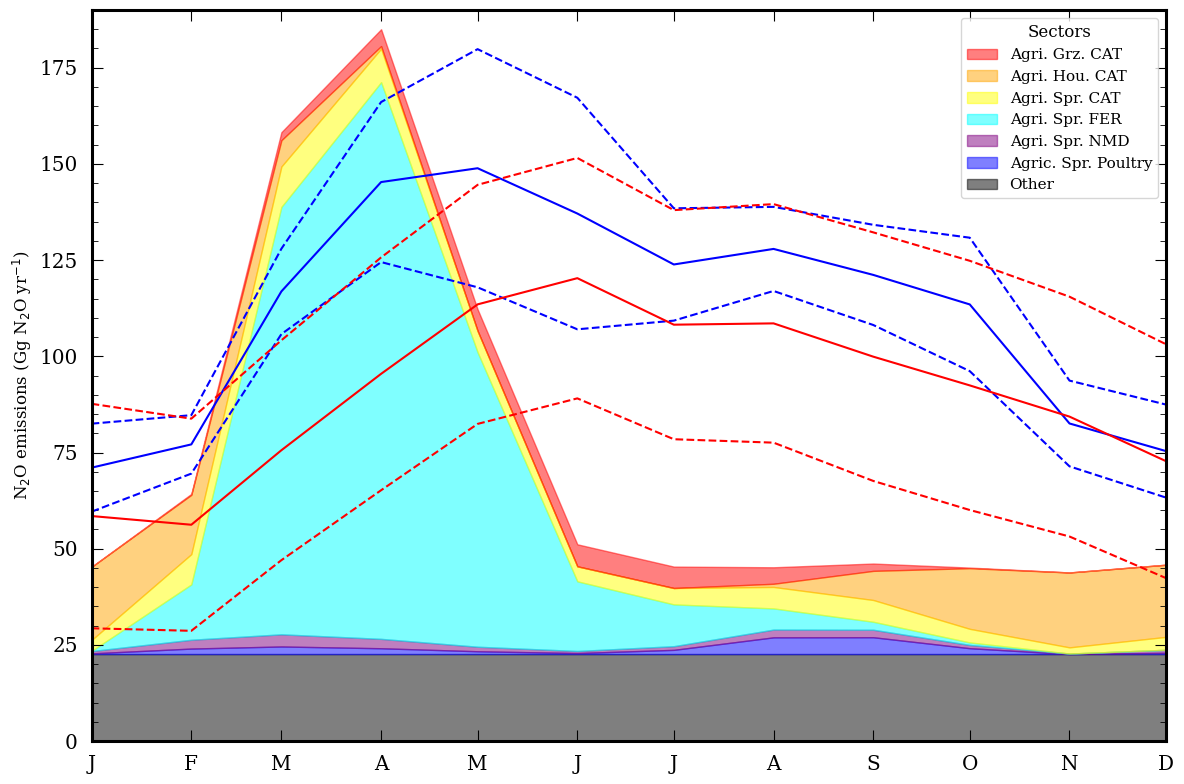

In [19]:
fig, ax = plt.subplots(figsize=(12,8))

# ALL OTHER
ax.fill_between(ukghg_monthly_profile['time'], 
                [0]*12, 
                ukghg_monthly_profile['ALL_OTHERS'], 
                color='k', alpha=0.5, label='Other')

# AGRIC SPR POULTRY
ax.fill_between(ukghg_monthly_profile['time'], 
                ukghg_monthly_profile['ALL_OTHERS'], 
                ukghg_monthly_profile['ALL_OTHERS']+ukghg_monthly_profile['AGRI_SPR_POU'],
                color='b', alpha=0.5, label='Agric. Spr. Poultry')

# AGRIC SPR NMD
ax.fill_between(ukghg_monthly_profile['time'],  
                ukghg_monthly_profile['ALL_OTHERS']+ukghg_monthly_profile['AGRI_SPR_POU'],
                ukghg_monthly_profile['ALL_OTHERS']+ukghg_monthly_profile['AGRI_SPR_POU']+ukghg_monthly_profile['AGRI_SPR_NMD'],
                color='purple', alpha=0.5, label='Agri. Spr. NMD')

# AGRIC SPR FER
ax.fill_between(ukghg_monthly_profile['time'],  
                ukghg_monthly_profile['ALL_OTHERS']+ukghg_monthly_profile['AGRI_SPR_POU']+ukghg_monthly_profile['AGRI_SPR_NMD'],
                ukghg_monthly_profile['ALL_OTHERS']+ukghg_monthly_profile['AGRI_SPR_POU']+ukghg_monthly_profile['AGRI_SPR_NMD']+ukghg_monthly_profile['AGRI_SPR_FER'],                
                color='cyan', alpha=0.5, label='Agri. Spr. FER')

# AGRI_SPR_CAT
ax.fill_between(ukghg_monthly_profile['time'],  
                ukghg_monthly_profile['ALL_OTHERS']+ukghg_monthly_profile['AGRI_SPR_POU']+ukghg_monthly_profile['AGRI_SPR_NMD']+ukghg_monthly_profile['AGRI_SPR_FER'],
                ukghg_monthly_profile['ALL_OTHERS']+ukghg_monthly_profile['AGRI_SPR_POU']+ ukghg_monthly_profile['AGRI_SPR_NMD']+ukghg_monthly_profile['AGRI_SPR_FER']+ukghg_monthly_profile['AGRI_SPR_CAT'],
                color='yellow', alpha=0.5, label='Agri. Spr. CAT')

# AGRIC HOU CAT
ax.fill_between(ukghg_monthly_profile['time'],  
                ukghg_monthly_profile['ALL_OTHERS']+ukghg_monthly_profile['AGRI_SPR_POU']+ukghg_monthly_profile['AGRI_SPR_NMD']+ukghg_monthly_profile['AGRI_SPR_FER']+ukghg_monthly_profile['AGRI_SPR_CAT'],
                ukghg_monthly_profile['ALL_OTHERS']+ukghg_monthly_profile['AGRI_SPR_POU']+ ukghg_monthly_profile['AGRI_SPR_NMD']+ukghg_monthly_profile['AGRI_SPR_FER']+ukghg_monthly_profile['AGRI_SPR_CAT']+ukghg_monthly_profile['AGRI_HOU_CAT'],
                color='orange', alpha=0.5, label='Agri. Hou. CAT')

# AGRI_GRZ_CAT
ax.fill_between(ukghg_monthly_profile['time'],  
                ukghg_monthly_profile['ALL_OTHERS']+ukghg_monthly_profile['AGRI_SPR_POU']+ukghg_monthly_profile['AGRI_SPR_NMD']+ukghg_monthly_profile['AGRI_SPR_FER']+ukghg_monthly_profile['AGRI_SPR_CAT']+ukghg_monthly_profile['AGRI_HOU_CAT'],
                ukghg_monthly_profile['ALL_OTHERS']+ukghg_monthly_profile['AGRI_SPR_POU']+ ukghg_monthly_profile['AGRI_SPR_NMD']+ukghg_monthly_profile['AGRI_SPR_FER']+ukghg_monthly_profile['AGRI_SPR_CAT']+ukghg_monthly_profile['AGRI_HOU_CAT']+ukghg_monthly_profile['AGRI_GRZ_CAT'],
                color='red', alpha=0.5, label='Agri. Grz. CAT')

# BMCMC
ax.plot(ukghg_monthly_profile['time'], (bmcmc_mu+bmcmc_68), 'b--')
ax.plot(ukghg_monthly_profile['time'], bmcmc_mu, 'b-')
ax.plot(ukghg_monthly_profile['time'], (bmcmc_mu-bmcmc_68), 'b--')


# INTEM
ax.plot(ukghg_monthly_profile['time'], (intem_mu+intem_68), 'r--')
ax.plot(ukghg_monthly_profile['time'], intem_mu, 'r-')
ax.plot(ukghg_monthly_profile['time'], (intem_mu-intem_68), 'r--')


# ax.plot(ukghg_monthly_profile['time'], (intem_seasonal_mu+intem_seasonal_68), 'r--')
# ax.plot(ukghg_monthly_profile['time'], intem_seasonal_mu, 'r-')
# ax.plot(ukghg_monthly_profile['time'], (intem_seasonal_mu-intem_seasonal_68), 'r--')



ax.set_xlim((dt.datetime(2015,1,1), dt.datetime(2015,12,1)))
ax.set_ylim((0,190))

xticks = ukghg_monthly_profile['time']
x_tick_labels = ['J','F','M','A','M','J','J','A','S','O','N','D']
ax.set_xticks(xticks)
ax.set_xticklabels(x_tick_labels)
ax.set_ylabel(r"N$_{2}$O emissions (Gg N$_{2}$O yr$^{-1}$)")
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), title='Sectors', loc='upper right', fontsize=11)

fig.tight_layout()
# plt.savefig("../fig_ukghg_opt/ukghg-bmcmc-noopt.jpg", dpi=300)
plt.show()

## Bayesian inference 

In [4]:
# Seasonal profiles for each sub-sector
profile_1 = np.nan_to_num(ukghg_monthly_profile['ALL_OTHERS'])
profile_2 = np.nan_to_num(ukghg_monthly_profile['AGRI_SPR_POU'])
profile_3 = np.nan_to_num(ukghg_monthly_profile['AGRI_SPR_NMD'])
profile_4 = np.nan_to_num(ukghg_monthly_profile['AGRI_SPR_FER'])
profile_5 = np.nan_to_num(ukghg_monthly_profile['AGRI_SPR_CAT'])
profile_6 = np.nan_to_num(ukghg_monthly_profile['AGRI_HOU_CAT'])
profile_7 = np.nan_to_num(ukghg_monthly_profile['AGRI_GRZ_CAT'])


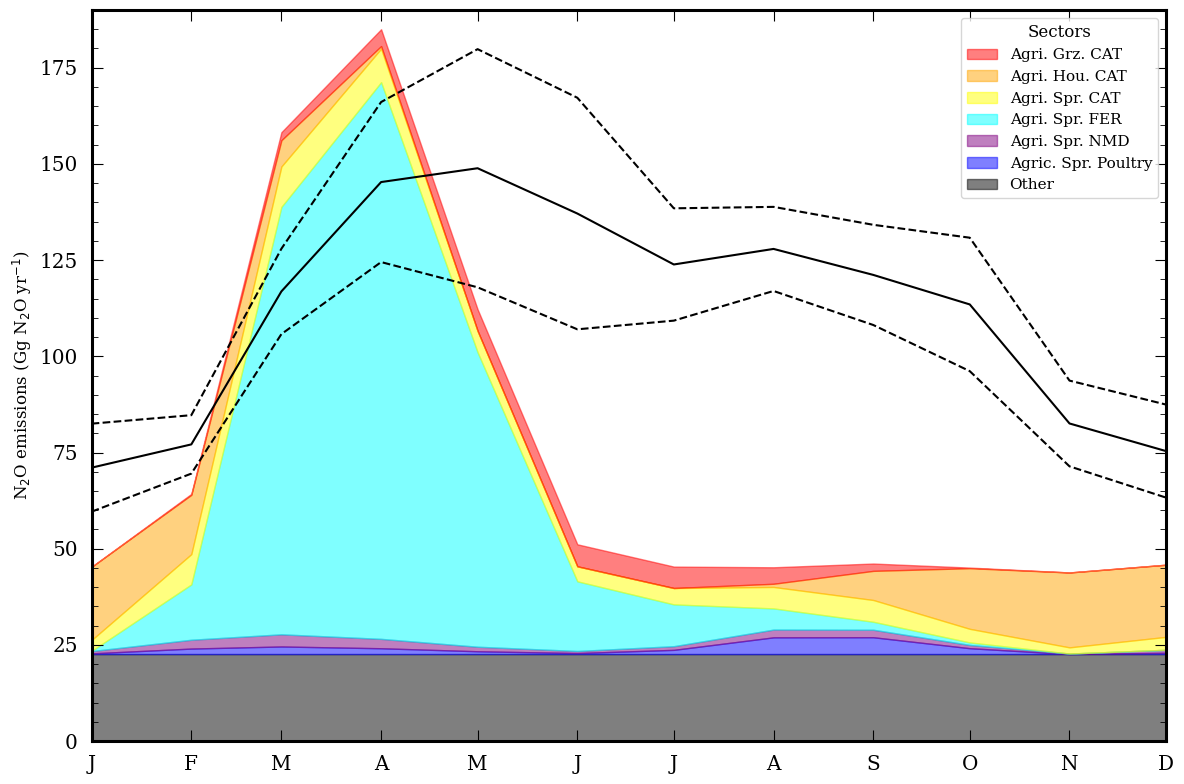

In [5]:
fig, ax = plt.subplots(figsize=(12,8))

# ALL OTHER
ax.fill_between(ukghg_monthly_profile['time'], 
                [0]*12, 
                profile_1, 
                color='k', alpha=0.5, label='Other')

# AGRIC SPR POULTRY
ax.fill_between(ukghg_monthly_profile['time'], 
                profile_1, 
                profile_1+profile_2,
                color='b', alpha=0.5, label='Agric. Spr. Poultry')

# AGRIC SPR NMD
ax.fill_between(ukghg_monthly_profile['time'],  
                profile_1+profile_2,
                profile_1+profile_2+profile_3,
                color='purple', alpha=0.5, label='Agri. Spr. NMD')

# AGRIC SPR FER
ax.fill_between(ukghg_monthly_profile['time'],  
                profile_1+profile_2+profile_3,
                profile_1+profile_2+profile_3+profile_4,
                color='cyan', alpha=0.5, label='Agri. Spr. FER')

# AGRI_SPR_CAT
ax.fill_between(ukghg_monthly_profile['time'],  
                profile_1+profile_2+profile_3+profile_4,
                profile_1+profile_2+profile_3+profile_4+profile_5,
                color='yellow', alpha=0.5, label='Agri. Spr. CAT')

# AGRIC HOU CAT
ax.fill_between(ukghg_monthly_profile['time'],  
                profile_1+profile_2+profile_3+profile_4+profile_5,
                profile_1+profile_2+profile_3+profile_4+profile_5+profile_6,
                color='orange', alpha=0.5, label='Agri. Hou. CAT')

# AGRI_GRZ_CAT
ax.fill_between(ukghg_monthly_profile['time'],  
                profile_1+profile_2+profile_3+profile_4+profile_5+profile_6,
                profile_1+profile_2+profile_3+profile_4+profile_5+profile_6+profile_7,
                color='red', alpha=0.5, label='Agri. Grz. CAT')



ax.plot(ukghg_monthly_profile['time'], (bmcmc_mu+bmcmc_68), 'k--')
ax.plot(ukghg_monthly_profile['time'], bmcmc_mu, 'k-')
ax.plot(ukghg_monthly_profile['time'], (bmcmc_mu-bmcmc_68), 'k--')


ax.set_xlim((dt.datetime(2015,1,1), dt.datetime(2015,12,1)))
ax.set_ylim((0,190))

xticks = ukghg_monthly_profile['time']
x_tick_labels = ['J','F','M','A','M','J','J','A','S','O','N','D']
ax.set_xticks(xticks)
ax.set_xticklabels(x_tick_labels)
ax.set_ylabel(r"N$_{2}$O emissions (Gg N$_{2}$O yr$^{-1}$)")
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), title='Sectors', loc='upper right', fontsize=11)

fig.tight_layout()
# plt.savefig("../fig_ukghg_opt/ukghg-bmcmc-noopt.jpg", dpi=300)
plt.show()

In [6]:
# PRIOR UKGHG PROFILES
h = np.zeros((12, 7))
h[:,0] = profile_1 # Other
h[:,1] = profile_2 # Poultry spreading
h[:,2] = profile_3 # digestate spreading
h[:,3] = profile_4 # fertilizer
h[:,4] = profile_5 # cattle spreading
h[:,5] = profile_6 # cattle housing
h[:,6] = profile_7 # cattle grazing
h = np.matrix(h)


# OBSERVATIONAL SEASONAL PROFILE
y = bmcmc_mu # In Gg/yr
y = np.matrix(y).T

y2 = np.matrix(intem_mu).T

# OBS uncert. 
# Assuming observations are uncorrelated in time (poor assumption?)
r = bmcmc_68
R = np.matrix(np.zeros((12,12)) + 0.0)
np.fill_diagonal(R, r**2)

r2 = intem_68
R2 = np.matrix(np.zeros((12,12)) + 0.0)
np.fill_diagonal(R2, r2**2)


# UKGHG UNCERT
# Assuming uncertainty of 50%

Q = np.matrix(np.zeros((7,7)) + 0.0)
q = np.array([0.61, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75])
# q = np.array([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]) * 0.5

np.fill_diagonal(Q, 1.*q**2)

# A priori scaling vector 
sf_p = np.matrix(np.zeros((7,1))+1.0)
print(sf_p.shape)

# ********************************
# sf_p: prior scaling factor
# q: prior uncertainty
# h: sensitivity (footprints x fluxes)
# r: model-data uncertainty 
# y: observations

# posterior scaling vector        
posterior = sf_p + (Q @ h.T) @ np.linalg.inv(h @ Q @ h.T + R) @ (y - h @ sf_p)
# Posterior covariance 
post_cov  = Q - (Q @ h.T) @ np.linalg.inv(h @ Q @ h.T + R) @ h @ Q

# InTEM
# posterior scaling vector        
posterior2 = sf_p + (Q @ h.T) @ np.linalg.inv(h @ Q @ h.T + R2) @ (y2 - h @ sf_p)
# Posterior covariance 
post_cov2  = Q - (Q @ h.T) @ np.linalg.inv(h @ Q @ h.T + R2) @ h @ Q


print("BMCMC Posterior scaling factor (1 sigma uncert.)")
print("-----------------")
print("Cattle grazing", np.round(posterior[6,0],6), "(", np.round(np.sqrt(np.diag(post_cov))[6],6), ")")
print("Cattle housing", np.round(posterior[5,0],6), "(", np.round(np.sqrt(np.diag(post_cov))[5],6), ")")
print("Cattle spreading", np.round(posterior[4,0],6), "(", np.round(np.sqrt(np.diag(post_cov))[4],6), ")")
print("Fertilizer", np.round(posterior[3,0],6), "(", np.round(np.sqrt(np.diag(post_cov))[3],6), ")")
print("Digestate spreading", np.round(posterior[2,0],6), "(", np.round(np.sqrt(np.diag(post_cov))[2],6), ")")
print("Poultry spreading", np.round(posterior[1,0],6), "(", np.round(np.sqrt(np.diag(post_cov))[1],6), ")")
print("All other", np.round(posterior[0,0],6), "(", np.round(np.sqrt(np.diag(post_cov))[0],6), ")")


print("InTEM Posterior scaling factor (1 sigma uncert.)")
print("-----------------")
print("Cattle grazing", np.round(posterior2[6,0],6), "(", np.round(np.sqrt(np.diag(post_cov2))[6],6), ")")
print("Cattle housing", np.round(posterior2[5,0],6), "(", np.round(np.sqrt(np.diag(post_cov2))[5],6), ")")
print("Cattle spreading", np.round(posterior2[4,0],6), "(", np.round(np.sqrt(np.diag(post_cov2))[4],6), ")")
print("Fertilizer", np.round(posterior2[3,0],6), "(", np.round(np.sqrt(np.diag(post_cov2))[3],6), ")")
print("Digestate spreading", np.round(posterior2[2,0],6), "(", np.round(np.sqrt(np.diag(post_cov2))[2],6), ")")
print("Poultry spreading", np.round(posterior2[1,0],6), "(", np.round(np.sqrt(np.diag(post_cov2))[1],6), ")")
print("All other", np.round(posterior2[0,0],6), "(", np.round(np.sqrt(np.diag(post_cov2))[0],6), ")")


(7, 1)
BMCMC Posterior scaling factor (1 sigma uncert.)
-----------------
Cattle grazing 5.117865 ( 1.509121 )
Cattle housing 0.058464 ( 0.564172 )
Cattle spreading 1.257431 ( 1.281503 )
Fertilizer 0.172442 ( 0.117772 )
Digestate spreading 0.990926 ( 1.696639 )
Poultry spreading 3.405416 ( 1.535401 )
All other 3.045096 ( 0.434038 )
InTEM Posterior scaling factor (1 sigma uncert.)
-----------------
Cattle grazing 3.189188 ( 1.611055 )
Cattle housing 0.876543 ( 0.872904 )
Cattle spreading 1.826088 ( 1.59019 )
Fertilizer 0.112869 ( 0.198501 )
Digestate spreading 1.105562 ( 1.731283 )
Poultry spreading 1.639457 ( 1.681 )
All other 2.054746 ( 0.492527 )


In [7]:
# posterior_prof = posterior*h
post_prof_1 = np.abs(np.array(posterior[0])[0][0]) * profile_1
post_prof_2 = np.abs(np.array(posterior[1])[0][0]) * profile_2
post_prof_3 = np.abs(np.array(posterior[2])[0][0]) * profile_3
post_prof_4 = np.abs(np.array(posterior[3])[0][0]) * profile_4
post_prof_5 = np.abs(np.array(posterior[4])[0][0]) * profile_5
post_prof_6 = np.abs(np.array(posterior[5])[0][0]) * profile_6
post_prof_7 = np.abs(np.array(posterior[6])[0][0]) * profile_7

post_prof_1i = np.abs(np.array(posterior2[0])[0][0]) * profile_1
post_prof_2i = np.abs(np.array(posterior2[1])[0][0]) * profile_2
post_prof_3i = np.abs(np.array(posterior2[2])[0][0]) * profile_3
post_prof_4i = np.abs(np.array(posterior2[3])[0][0]) * profile_4
post_prof_5i = np.abs(np.array(posterior2[4])[0][0]) * profile_5
post_prof_6i = np.abs(np.array(posterior2[5])[0][0]) * profile_6
post_prof_7i = np.abs(np.array(posterior2[6])[0][0]) * profile_7


In [8]:
def gaussian(x, mu, sigma):
    alpha = 1/(sigma * np.sqrt(2*np.pi))
    beta = -(x-mu)**2/(2*sigma**2)
    y = alpha * np.exp(beta)
    return y

xx = np.linspace(-5, 8, 1000)

dist_1_bmcmc = gaussian(xx, posterior[0,0], np.sqrt(np.diag(post_cov))[0])
dist_2_bmcmc = gaussian(xx, posterior[1,0], np.sqrt(np.diag(post_cov))[1])
dist_3_bmcmc = gaussian(xx, posterior[2,0], np.sqrt(np.diag(post_cov))[2])
dist_4_bmcmc = gaussian(xx, posterior[3,0], np.sqrt(np.diag(post_cov))[3])
dist_5_bmcmc = gaussian(xx, posterior[4,0], np.sqrt(np.diag(post_cov))[4])
dist_6_bmcmc = gaussian(xx, posterior[5,0], np.sqrt(np.diag(post_cov))[5])
dist_7_bmcmc = gaussian(xx, posterior[6,0], np.sqrt(np.diag(post_cov))[6])

dist_1_intem = gaussian(xx, posterior2[0,0], np.sqrt(np.diag(post_cov2))[0])
dist_2_intem = gaussian(xx, posterior2[1,0], np.sqrt(np.diag(post_cov2))[1])
dist_3_intem = gaussian(xx, posterior2[2,0], np.sqrt(np.diag(post_cov2))[2])
dist_4_intem = gaussian(xx, posterior2[3,0], np.sqrt(np.diag(post_cov2))[3])
dist_5_intem = gaussian(xx, posterior2[4,0], np.sqrt(np.diag(post_cov2))[4])
dist_6_intem = gaussian(xx, posterior2[5,0], np.sqrt(np.diag(post_cov2))[5])
dist_7_intem = gaussian(xx, posterior2[6,0], np.sqrt(np.diag(post_cov2))[6])

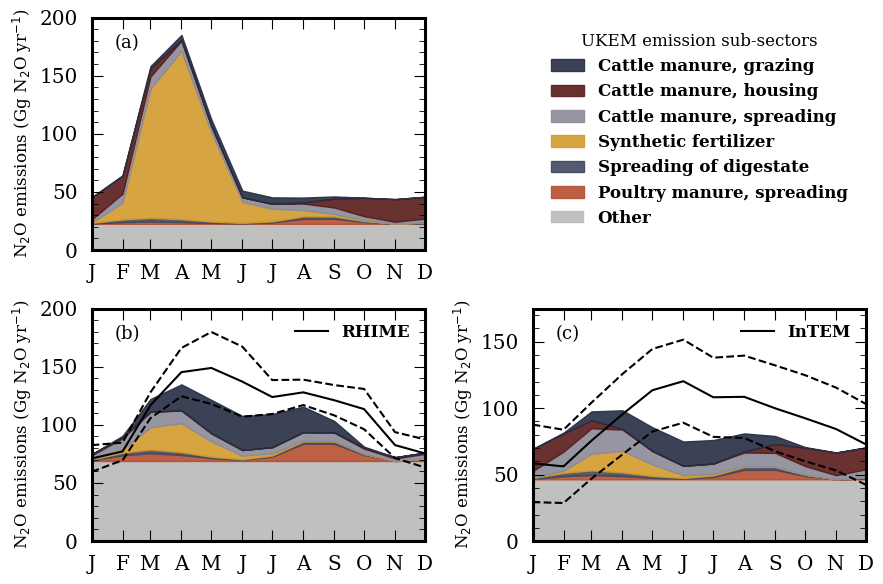

In [12]:
alpha = 0.9

col1 = '#262d42'
col2 = '#591c19'
col3 = '#8b8b99'
col4 = '#d39a2d'
col5 = '#41485f'
col6 = '#b64f32'
col7 = '#b9b9b8'

fig, ax = plt.subplots(2,2, figsize=(9,6))

# UPPER PANEL (ORIGINAL)
ax[0,0].fill_between(ukghg_monthly_profile['time'], 
                [0]*12, 
                profile_1, 
                color=col7, alpha=alpha, hatch='', label='Other', lw=0.3)

ax[0,0].fill_between(ukghg_monthly_profile['time'], 
                profile_1, 
                profile_1+profile_2,
                color=col6, alpha=alpha, label='Poultry manure, spreading')

ax[0,0].fill_between(ukghg_monthly_profile['time'], 
                profile_1+profile_2,
                profile_1+profile_2+profile_3,
                color=col5, alpha=alpha, label='Spreading of digestate')

ax[0,0].fill_between(ukghg_monthly_profile['time'], 
                profile_1+profile_2+profile_3,
                profile_1+profile_2+profile_3+profile_4,
                color=col4, alpha=alpha, label='Synthetic fertilizer')

ax[0,0].fill_between(ukghg_monthly_profile['time'], 
                profile_1+profile_2+profile_3+profile_4,
                profile_1+profile_2+profile_3+profile_4+profile_5,
                color=col3, alpha=alpha, label='Cattle manure, spreading')

ax[0,0].fill_between(ukghg_monthly_profile['time'], 
                profile_1+profile_2+profile_3+profile_4+profile_5,
                profile_1+profile_2+profile_3+profile_4+profile_5+profile_6,
                color=col2, alpha=alpha, label='Cattle manure, housing')

ax[0,0].fill_between(ukghg_monthly_profile['time'], 
                profile_1+profile_2+profile_3+profile_4+profile_5+profile_6,
                profile_1+profile_2+profile_3+profile_4+profile_5+profile_6+profile_7,
                color=col1, alpha=alpha, label='Cattle manure, grazing')


ax[0,0].set_xlim((dt.datetime(2015,1,1), dt.datetime(2015,12,1)))
ax[0,0].set_ylim((0,200))

xticks = ukghg_monthly_profile['time']
x_tick_labels = ['J','F','M','A','M','J','J','A','S','O','N','D']
ax[0,0].set_xticks(xticks)
ax[0,0].set_xticklabels(x_tick_labels)
ax[0,0].set_ylabel(r"N$_{2}$O emissions (Gg N$_{2}$O yr$^{-1}$)")


# TOP RIGHT 
ax[0,1].spines['left'].set_color('white')
ax[0,1].spines['right'].set_color('white')
ax[0,1].spines['bottom'].set_color('white')
ax[0,1].spines['top'].set_color('white')
ax[0,1].set_xticks([])
ax[0,1].set_yticks([])


# MIDDLE LEFT (ADJUSTED, BMCMC)
ax[1,0].fill_between(ukghg_monthly_profile['time'], 
                [0]*12, 
                post_prof_1 , 
                color=col7, alpha=alpha, hatch='', lw=0.8)

ax[1,0].fill_between(ukghg_monthly_profile['time'], 
                post_prof_1, 
                post_prof_1+post_prof_2,
                color=col6, alpha=alpha)

ax[1,0].fill_between(ukghg_monthly_profile['time'], 
                post_prof_1+post_prof_2,
                post_prof_1+post_prof_2+post_prof_3,
                color=col5, alpha=alpha)

ax[1,0].fill_between(ukghg_monthly_profile['time'], 
                post_prof_1+post_prof_2+post_prof_3,
                post_prof_1+post_prof_2+post_prof_3+post_prof_4,
                color=col4, alpha=alpha)

ax[1,0].fill_between(ukghg_monthly_profile['time'], 
                post_prof_1+post_prof_2+post_prof_3+post_prof_4,
                post_prof_1+post_prof_2+post_prof_3+post_prof_4+post_prof_5,
                color=col3, alpha=alpha)

ax[1,0].fill_between(ukghg_monthly_profile['time'], 
                post_prof_1+post_prof_2+post_prof_3+post_prof_4+post_prof_5,
                post_prof_1+post_prof_2+post_prof_3+post_prof_4+post_prof_5+post_prof_6,
                color=col2, alpha=alpha)


ax[1,0].fill_between(ukghg_monthly_profile['time'], 
                post_prof_1+post_prof_2+post_prof_3+post_prof_4+post_prof_5+post_prof_6,
                post_prof_1+post_prof_2+post_prof_3+post_prof_4+post_prof_5+post_prof_6+post_prof_7,
                color=col1, alpha=alpha)


ax[1,0].set_xlim((dt.datetime(2015,1,1), dt.datetime(2015,12,1)))
ax[1,0].set_ylim((0, 200))

xticks = ukghg_monthly_profile['time']
x_tick_labels = ['J','F','M','A','M','J','J','A','S','O','N','D']
ax[1,0].set_xticks(xticks)
ax[1,0].set_xticklabels(x_tick_labels)

ax[1,0].set_ylabel(r"N$_{2}$O emissions (Gg N$_{2}$O yr$^{-1}$)")

ax[1,0].plot(ukghg_monthly_profile['time'], (bmcmc_mu+bmcmc_68), '--', color='black')
ax[1,0].plot(ukghg_monthly_profile['time'], bmcmc_mu, '-', label="RHIME", color='black')
ax[1,0].plot(ukghg_monthly_profile['time'], (bmcmc_mu-bmcmc_68), '--', color='black')

handles, labels = ax[0,0].get_legend_handles_labels()
ax[0,1].legend(reversed(handles), reversed(labels), title='UKEM emission sub-sectors', loc='upper center', fontsize=12, fancybox=False, frameon=False, prop={'weight':'bold'})

ax[1,0].legend(loc=1, fancybox=False, frameon=False, prop={'weight':'bold'})


# MIDDLE RIGHT (ADJUSTED, InTEM)
ax[1,1].fill_between(ukghg_monthly_profile['time'], 
                [0]*12, 
                post_prof_1i , 
                color=col7, alpha=alpha, hatch='', lw=0.8)

ax[1,1].fill_between(ukghg_monthly_profile['time'], 
                post_prof_1i, 
                post_prof_1i+post_prof_2i,
                color=col6, alpha=alpha)

ax[1,1].fill_between(ukghg_monthly_profile['time'], 
                post_prof_1i+post_prof_2i,
                post_prof_1i+post_prof_2i+post_prof_3i,
                color=col5, alpha=alpha)

ax[1,1].fill_between(ukghg_monthly_profile['time'], 
                post_prof_1i+post_prof_2i+post_prof_3i,
                post_prof_1i+post_prof_2i+post_prof_3i+post_prof_4i,
                color=col4, alpha=alpha)

ax[1,1].fill_between(ukghg_monthly_profile['time'], 
                post_prof_1i+post_prof_2i+post_prof_3i+post_prof_4i,
                post_prof_1i+post_prof_2i+post_prof_3i+post_prof_4i+post_prof_5i,
                color=col3, alpha=alpha)

ax[1,1].fill_between(ukghg_monthly_profile['time'], 
                post_prof_1i+post_prof_2i+post_prof_3i+post_prof_4i+post_prof_5i,
                post_prof_1i+post_prof_2i+post_prof_3i+post_prof_4i+post_prof_5i+post_prof_6i,
                color=col2, alpha=alpha)


ax[1,1].fill_between(ukghg_monthly_profile['time'], 
                post_prof_1i+post_prof_2i+post_prof_3i+post_prof_4i+post_prof_5i+post_prof_6i,
                post_prof_1i+post_prof_2i+post_prof_3i+post_prof_4i+post_prof_5i+post_prof_6i+post_prof_7i,
                color=col1, alpha=alpha)


ax[1,1].set_xlim((dt.datetime(2015,1,1), dt.datetime(2015,12,1)))
ax[1,1].set_ylim((0, 175))
xticks = ukghg_monthly_profile['time']
x_tick_labels = ['J','F','M','A','M','J','J','A','S','O','N','D']
ax[1,1].set_xticks(xticks)
ax[1,1].set_xticklabels(x_tick_labels)
ax[1,1].set_ylabel(r"N$_{2}$O emissions (Gg N$_{2}$O yr$^{-1}$)")

ax[1,1].plot(ukghg_monthly_profile['time'], (intem_mu+intem_68), '--', color='black')
ax[1,1].plot(ukghg_monthly_profile['time'], intem_mu, '-', label="InTEM", color='black')
ax[1,1].plot(ukghg_monthly_profile['time'], (intem_mu-intem_68), '--', color='black')


ax[1,1].legend(loc=1, fancybox=False, frameon=False, prop={'weight':'bold'})


# LOWER PANELS, POSTERIOR PDFs

# ax[2,0].plot(xx, dist_1_bmcmc, '-', color=col7, lw=2.5)
# ax[2,0].plot(xx, dist_2_bmcmc, '-', color=col6, lw=2.5)
# ax[2,0].plot(xx, dist_3_bmcmc, '-', color=col5, lw=2.5)
# ax[2,0].plot(xx, dist_4_bmcmc, '-', color=col4, lw=2.5)
# ax[2,0].plot(xx, dist_5_bmcmc, '-', color=col3, lw=2.5)
# ax[2,0].plot(xx, dist_6_bmcmc, '-', color=col2, lw=2.5)
# ax[2,0].plot(xx, dist_7_bmcmc, '-', color=col1, lw=2.5)
# ax[2,0].axvline(1, color='k')
# ax[2,0].set_xlim((-1, 8))
# ax[2,0].set_xlabel("Posterior scale factor")
# ax[2,0].set_ylabel("Probability density")


# ax[2,1].plot(xx, dist_1_intem, '-', color=col7, lw=2.5)
# ax[2,1].plot(xx, dist_2_intem, '-', color=col6, lw=2.5)
# ax[2,1].plot(xx, dist_3_intem, '-', color=col5, lw=2.5)
# ax[2,1].plot(xx, dist_4_intem, '-', color=col4, lw=2.5)
# ax[2,1].plot(xx, dist_5_intem, '-', color=col3, lw=2.5)
# ax[2,1].plot(xx, dist_6_intem, '-', color=col2, lw=2.5)
# ax[2,1].plot(xx, dist_7_intem, '-', color=col1, lw=2.5)
# ax[2,1].axvline(1, color='k')
# ax[2,1].set_xlim((-1, 8))
# ax[2,1].set_xlabel("Posterior scale factor")
# ax[2,1].set_ylabel("Probability density")



ax[0,0].text(1-0.93, 0.87,'(a)', transform=ax[0,0].transAxes, fontsize=13)
ax[1,0].text(1-0.93, 0.87,'(b)', transform=ax[1,0].transAxes, fontsize=13)
ax[1,1].text(1-0.93, 0.87,'(c)', transform=ax[1,1].transAxes, fontsize=13)
# ax[2,0].text(1-0.93, 0.87,'(d)', transform=ax[2,0].transAxes, fontsize=13)
# ax[2,1].text(1-0.93, 0.87,'(e)', transform=ax[2,1].transAxes, fontsize=13)


# ax[2,0].text(0.50, 0.81,'Bristol-MCMC', transform=ax[2,0].transAxes, fontsize=13, weight="bold")
# ax[2,1].text(0.7, 0.81,'InTEM', transform=ax[2,1].transAxes, fontsize=13, weight="bold")


fig.tight_layout()
plt.savefig("ukghg-optimization-mk4.jpg", dpi=300)
# plt.show()

In [160]:
posterior

matrix([[2.77911249],
        [3.28920081],
        [1.12814619],
        [0.19779163],
        [1.62706875],
        [0.29984229],
        [4.86055606]])

In [17]:
np.diag(np.sqrt(post_cov))

/tmp/ipykernel_37305/3236261714.py:1: RuntimeWarning: invalid value encountered in sqrt
  np.diag(np.sqrt(post_cov))


array([0.36404493, 0.93168465, 0.98026221, 0.08425548, 0.86221285,
       0.43900381, 0.93715815])

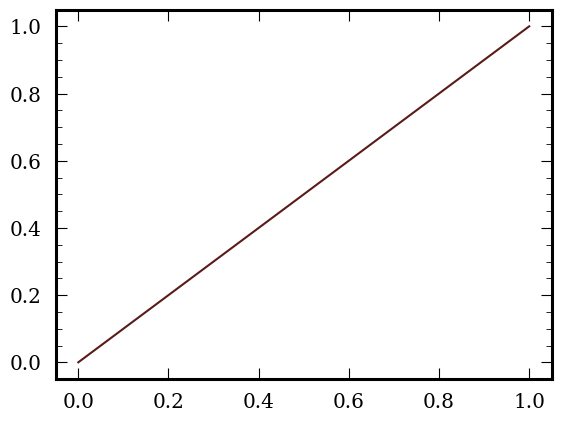

In [49]:
plt.plot([0,1], [0,1], '-', color='#591c19')

In [83]:
"#9b332b","#5d6174","#f7c267","#b9b9b8","#b64f32","#41485f","#d39a2d","#8b8b99","#591c19","#262d42"


('#9b332b',
 '#5d6174',
 '#f7c267',
 '#b9b9b8',
 '#b64f32',
 '#41485f',
 '#d39a2d',
 '#8b8b99',
 '#591c19',
 '#262d42')

In [8]:
import scipy.stats as stats

In [10]:
ukem_seasonal = profile_1 + profile_2 + profile_3 + profile_4 + profile_5 + profile_6 + profile_7

In [11]:
intem_post= post_prof_1i+post_prof_2i+post_prof_3i+post_prof_4i+post_prof_5i+post_prof_6i+post_prof_7i
mcmc_post = post_prof_1+post_prof_2+post_prof_3+post_prof_4+post_prof_5+post_prof_6+post_prof_7

In [20]:
print("UKEM prior vs. InTEM optimized:\n",stats.linregress(ukem_seasonal, intem_post))
print("")
print("InTEM vs. InTEM optimized:\n",stats.linregress(intem_mu, intem_post))

UKEM prior vs. InTEM optimized:
 LinregressResult(slope=0.19052498039145416, intercept=65.20418099134419, rvalue=0.9119964631905805, pvalue=3.580661734193988e-05, stderr=0.027098944597908323, intercept_stderr=2.3848549136367607)

InTEM vs. InTEM optimized:
 LinregressResult(slope=0.05434995860682149, intercept=74.37898329046371, rvalue=0.11079684569999816, pvalue=0.7317498116747736, stderr=0.1541663667020579, intercept_stderr=14.296267659534427)


In [21]:
print("UKEM prior vs. RHIME optimized:\n",stats.linregress(ukem_seasonal, mcmc_post))
print("")
print("RHIME vs. RHIME optimized:\n",stats.linregress(bmcmc_mu, mcmc_post))

UKEM prior vs. RHIME optimized:
 LinregressResult(slope=0.3092567724645195, intercept=77.88098086767423, rvalue=0.7240391566048269, pvalue=0.007754789614690241, stderr=0.09316535855758036, intercept_stderr=8.199059647287)

RHIME vs. RHIME optimized:
 LinregressResult(slope=0.6512123008932438, intercept=28.002193598711628, rvalue=0.8610687894782456, pvalue=0.0003213239621775031, stderr=0.12160904287053927, intercept_stderr=13.975340266419051)


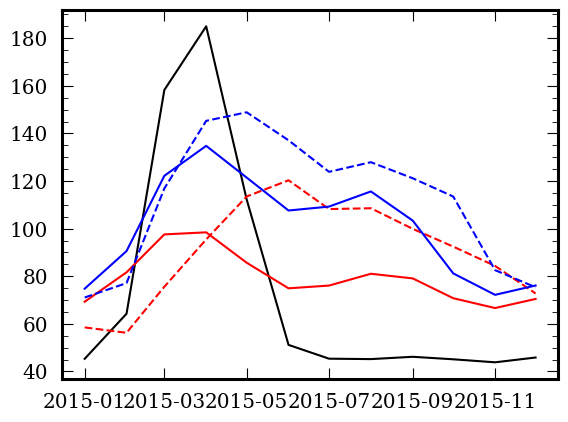

In [22]:
fig, ax = plt.subplots()
ax.plot(ukghg_monthly_profile['time'], ukem_seasonal, 'k-')
ax.plot(ukghg_monthly_profile['time'], intem_post, 'r-')
ax.plot(ukghg_monthly_profile['time'], intem_mu, 'r--')

ax.plot(ukghg_monthly_profile['time'], mcmc_post, 'b-')
ax.plot(ukghg_monthly_profile['time'], bmcmc_mu, 'b--')


plt.show()